In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
df_USA = pd.read_csv('../usa_covid_harmonized.csv')
df_USA.time_report = pd.to_datetime(df_USA.time_report)

In [3]:
df_USA.head()

,Unnamed: 0,Unnamed: 0.1,time_report,region_small_name,region_large_name,region_small_code,region_large_code,country_iso,country_name,latitude,longitude,type,value,source,uuid
0,0,0,2020-01-21,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
1,1,1,2020-01-22,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
2,2,2,2020-01-23,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
3,3,3,2020-01-24,Cook,Illinois,17,31,USA,United States of America,41.894294,-87.645455,total_positive,1,https://github.com/nytimes/covid-19-data,NaN
4,4,4,2020-01-24,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1,https://github.com/nytimes/covid-19-data,NaN


In [4]:
df_USA = df_USA.drop(['Unnamed: 0','Unnamed: 0.1','source','uuid'], axis='columns')

In [5]:
df_USA.head()

,time_report,region_small_name,region_large_name,region_small_code,region_large_code,country_iso,country_name,latitude,longitude,type,value
0,2020-01-21,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1
1,2020-01-22,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1
2,2020-01-23,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1
3,2020-01-24,Cook,Illinois,17,31,USA,United States of America,41.894294,-87.645455,total_positive,1
4,2020-01-24,Snohomish,Washington,53,61,USA,United States of America,48.070464,-121.936784,total_positive,1


In [6]:
df_CH = pd.read_csv('../switzerland_covid.csv')
df_CH.date = pd.to_datetime(df_CH.date)
df_CH.country_iso = df_CH.country_iso.str.upper()

In [7]:
df_CH.head()

,source,reporting_date,date,country_iso,region_code,region_code_native,lat,long,gender,age,type,value
0,Switzerland,NaN,2020-03-06,CHE,AG,Aargau,47.449406,8.327495,NaN,NaN,hospitalized_with_symptoms,NaN
1,Switzerland,NaN,2020-03-06,CHE,AI,Appenzell Innerrhoden,47.328414,9.409647,NaN,NaN,hospitalized_with_symptoms,NaN
2,Switzerland,NaN,2020-03-06,CHE,AR,Appenzell Ausserrhoden,47.382710,9.271860,NaN,NaN,hospitalized_with_symptoms,NaN
3,Switzerland,NaN,2020-03-06,CHE,BE,Bern,46.916667,7.466667,NaN,NaN,hospitalized_with_symptoms,NaN
4,Switzerland,NaN,2020-03-06,CHE,BL,Baselland,47.482779,7.742975,NaN,NaN,hospitalized_with_symptoms,NaN


In [8]:
df_CH = df_CH.drop(['reporting_date','gender','age'], axis='columns').dropna(subset=['value'])

In [9]:
df_CH.head()

,source,date,country_iso,region_code,region_code_native,lat,long,type,value
2288,Switzerland,2020-03-06,CHE,AG,Aargau,47.449406,8.327495,total_currently_positive_cases,10.0
2289,Switzerland,2020-03-06,CHE,AI,Appenzell Innerrhoden,47.328414,9.409647,total_currently_positive_cases,0.0
2290,Switzerland,2020-03-06,CHE,AR,Appenzell Ausserrhoden,47.382710,9.271860,total_currently_positive_cases,1.0
2291,Switzerland,2020-03-06,CHE,BE,Bern,46.916667,7.466667,total_currently_positive_cases,20.0
2292,Switzerland,2020-03-06,CHE,BL,Baselland,47.482779,7.742975,total_currently_positive_cases,9.0


In [10]:
df_CH.columns = ['country_name','time_report','country_iso','region_small_code','region_small_name','latitude','longitude','type','value']
df_CH = df_CH.loc[:,['time_report','region_small_name','region_small_code','country_iso','country_name','latitude','longitude','type','value']]

In [11]:
df_CH.head()

,time_report,region_small_name,region_small_code,country_iso,country_name,latitude,longitude,type,value
2288,2020-03-06,Aargau,AG,CHE,Switzerland,47.449406,8.327495,total_currently_positive_cases,10.0
2289,2020-03-06,Appenzell Innerrhoden,AI,CHE,Switzerland,47.328414,9.409647,total_currently_positive_cases,0.0
2290,2020-03-06,Appenzell Ausserrhoden,AR,CHE,Switzerland,47.382710,9.271860,total_currently_positive_cases,1.0
2291,2020-03-06,Bern,BE,CHE,Switzerland,46.916667,7.466667,total_currently_positive_cases,20.0
2292,2020-03-06,Baselland,BL,CHE,Switzerland,47.482779,7.742975,total_currently_positive_cases,9.0


In [12]:
df = pd.concat([df_USA, df_CH])

/home/pegger/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
from matplotlib.ticker import ScalarFormatter

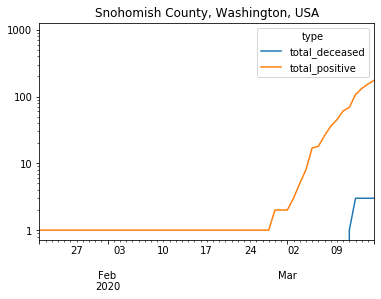

In [20]:
country = 'USA'
state = 'Washington'
county = 'Snohomish County'
this_plot = df.loc[np.logical_and(df.region_large_name==state, df.region_small_name==county.replace(' County','')), ['time_report', 'type', 'value']].pivot(index='time_report', columns='type')
this_plot.columns = this_plot.columns.droplevel()
this_plot.plot()
plt.xlim('2020-01-21', '2020-03-15')
plt.yscale('log')
plt.xlabel('')
plt.title('%s, %s, %s' % (county, state, country))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

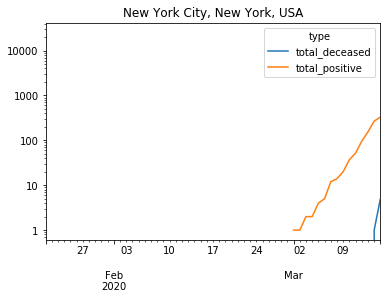

In [22]:
country = 'USA'
state = 'New York'
county = 'New York City'
this_plot = df.loc[np.logical_and(df.region_large_name==state, df.region_small_name==county.replace(' County','')), ['time_report', 'type', 'value']].pivot(index='time_report', columns='type')
this_plot.columns = this_plot.columns.droplevel()
this_plot.plot()
plt.xlim('2020-01-21', '2020-03-15')
plt.yscale('log')
plt.xlabel('')
plt.title('%s, %s, %s' % (county, state, country))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

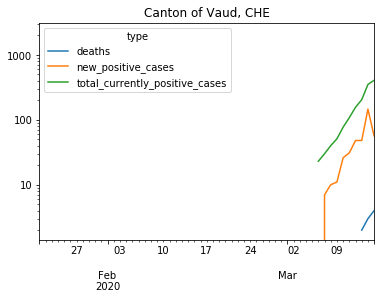

In [21]:
country = 'CHE'
canton = 'Canton of Vaud'
this_plot = df.loc[df.region_small_name==canton.replace('Canton of ',''), ['time_report', 'type', 'value']].pivot(index='time_report', columns='type')
this_plot.columns = this_plot.columns.droplevel()
this_plot.plot()
plt.xlim('2020-01-21', '2020-03-15')
plt.yscale('log')
plt.xlabel('')
plt.title('%s, %s' % (canton, country))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()